In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('twitch_log_221027_0905.tsv', sep='\t', header=None)
df.tail()

,0,1,2,3,4
424200,하다___ (hadaramg0125),[다이어트3일차] 많이 밀어보자 근데 이제 내가 밀고싶은만큼을 곁들인,시청자 82명,The Witcher 3: Wild Hunt,2022-10-27 09:05:04.063769
424201,잔양1 (zanyang),전장 부계 자다 깨서 몇판,시청자 79명,Hearthstone,2022-10-27 09:05:04.063769
424202,난현__ (nanhyeon),지금 아니면 못보는 방송 ヾ(•ω•`)o,시청자 78명,Just Chatting,2022-10-27 09:05:04.063769
424203,고먐잉 (rhaia11),목요일,시청자 76명,Just Chatting,2022-10-27 09:05:04.063769
424204,루시멜로 (lucimallow),[루루🐥] ㅠㅠ무극 말 없어졌어어으ㅠㅠㅜㅠㅜㅠㅜ,시청자 75명,Lost Ark,2022-10-27 09:05:04.063769


In [5]:
df.columns = ['이름', '제목','시청자수','카테고리','일시']

### 시청자수 전처리

In [6]:
df['시청자수'] = df['시청자수'].str.replace('시청자 ', '')
df['시청자수'] = df['시청자수'].str.replace('명', '')
df['시청자수'] = df['시청자수'].str.replace(',', '')
df1 = df[df['시청자수'].str.find('만') > 0]
df2 = df1['시청자수'].str.replace('만', '').astype(float)*10000 + 500
df.loc[df2.index, '시청자수'] = df2
df

,이름,제목,시청자수,카테고리,일시
0,우왁굳 (woowakgood),축구왕 왁돌이,14500.0,FIFA 23,2022-09-27 19:02:22.436272
1,침착맨 (zilioner),침&펄 저녁식사 먹기 (구독후원음성X),9687,Just Chatting,2022-09-27 19:02:22.436272
2,비챤_ (viichan6),6시) VRC 풀트뱅 ~!,9491,VRChat,2022-09-27 19:02:22.436272
3,한동숙 (handongsuk),발낳대 스크림,8103,VALORANT,2022-09-27 19:02:22.436272
4,괴물쥐123 (tmxk319),발낳대 전 스크림,8098,VALORANT,2022-09-27 19:02:22.436272
...,...,...,...,...,...
424200,하다___ (hadaramg0125),[다이어트3일차] 많이 밀어보자 근데 이제 내가 밀고싶은만큼을 곁들인,82,The Witcher 3: Wild Hunt,2022-10-27 09:05:04.063769
424201,잔양1 (zanyang),전장 부계 자다 깨서 몇판,79,Hearthstone,2022-10-27 09:05:04.063769
424202,난현__ (nanhyeon),지금 아니면 못보는 방송 ヾ(•ω•`)o,78,Just Chatting,2022-10-27 09:05:04.063769
424203,고먐잉 (rhaia11),목요일,76,Just Chatting,2022-10-27 09:05:04.063769


In [7]:
df.drop(df[df['시청자수'] == 'League of Legends'].index, inplace=True)
df.drop(df[df['시청자수'].isnull()].index, inplace=True)
df['시청자수'] = df['시청자수'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424183 entries, 0 to 424204
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   이름      424183 non-null  object
 1   제목      424183 non-null  object
 2   시청자수    424183 non-null  int32 
 3   카테고리    424183 non-null  object
 4   일시      424183 non-null  object
dtypes: int32(1), object(4)
memory usage: 17.8+ MB


In [8]:
# 스트리머별 평균 시청자수 내림차순으로 정렬
df1 = df
name = df1.groupby('이름').mean().sort_values('시청자수', ascending=False)[:20]
name

,시청자수
이름,
LCK_Korea,47747.763810
우왁굳 (woowakgood),16252.337553
한동숙 (handongsuk),14591.082276
풍월량 (hanryang1125),14506.202183
enchantenter,13679.462585
아이네_ (vo_ine),12471.908784
랄로 (aba4647),11229.294931
양띵 (yd0821),9978.756233
릴파_ (lilpaaaaaa),9932.240441


In [27]:
# 게임별 시청자수 내림차순으로 정렬
category = df1.groupby('카테고리').mean().sort_values('시청자수', ascending=False)[:20]
category

,시청자수
카테고리,
Motesolo : No Girlfriend Since Birth,20338.209302
SteamWorld Dig 2,18218.750000
Home Sweet Home,17572.727273
Brewmaster,16166.666667
Shadows Peak,14941.860465
Quest Room,14333.333333
StarCraft: Remastered,13673.341463
Zero Sievert,13541.666667
Falling Out,13025.000000


In [22]:
df1[df1['카테고리'] == 'League of Legends'].mean()

C:\Users\tjoeun-jr-902-02\AppData\Local\Temp\ipykernel_21488\2340966570.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1[df1['카테고리'] == 'League of Legends'].mean()


시청자수    3021.496518
dtype: float64

In [26]:
df1[df1['카테고리'] == 'Just Chatting'].mean()

C:\Users\tjoeun-jr-902-02\AppData\Local\Temp\ipykernel_21488\1038102983.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1[df1['카테고리'] == 'Just Chatting'].mean()


시청자수    1881.458134
dtype: float64

In [20]:
df2 = df1.set_index('이름')
df3 = df2.loc[name.index]
df3

,제목,시청자수,카테고리,일시
이름,,,,
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:00:05.647274
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:05:05.461526
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:10:05.154451
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:15:05.314280
LCK_Korea,2022 월드 챔피언십 Play-In Stage Day 1,500,League of Legends,2022-09-30 04:20:07.268227
...,...,...,...,...
오킹 (obm1025),대장정 8일차 전라도 입성 목표,5068,Just Chatting,2022-10-27 08:45:04.044642
오킹 (obm1025),대장정 8일차 전라도 입성 목표,5175,Just Chatting,2022-10-27 08:50:04.076074
오킹 (obm1025),대장정 8일차 전라도 입성 목표,5331,Just Chatting,2022-10-27 08:55:04.051693


In [21]:
df3.index

Index(['LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea',
       'LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea', 'LCK_Korea',
       ...
       '오킹 (obm1025)', '오킹 (obm1025)', '오킹 (obm1025)', '오킹 (obm1025)',
       '오킹 (obm1025)', '오킹 (obm1025)', '오킹 (obm1025)', '오킹 (obm1025)',
       '오킹 (obm1025)', '오킹 (obm1025)'],
      dtype='object', name='이름', length=24685)

In [34]:
# 스트리머
df_p = df[df['이름']=='풍월량 (hanryang1125)']
df_p.groupby('카테고리').mean().sort_values('시청자수', ascending=False)

,시청자수
카테고리,
Goose Goose Duck,22258.064516
Lazaret,20857.142857
Bus World,17944.444444
Home Sweet Home,17572.727273
Games + Demos,16928.571429
Dragon Ball: The Breakers,16828.125000
The Bathhouse,16537.037037
Gundam Evolution,16400.000000
Brotato,16013.888889


NameError: name 'df3' is not defined

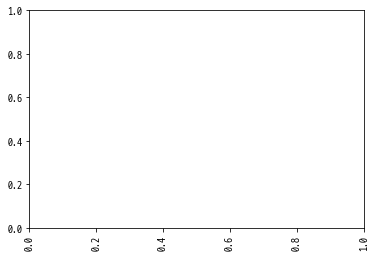

In [10]:
import matplotlib.pyplot as plt
# 한글 처리
from matplotlib import rc
rc('font', family='D2Coding')

plt.xticks(rotation="vertical")
plt.hist(df3['카테고리'])
plt.show()

In [9]:
df_p = df[df['이름']=='풍월량 (hanryang1125)']
df_p

,이름,제목,시청자수,카테고리,일시
919,풍월량 (hanryang1125),풍월량,1370,Just Chatting,2022-09-27 20:30:06.475437
968,풍월량 (hanryang1125),풍월량,1487,Just Chatting,2022-09-27 20:35:04.698807
995,풍월량 (hanryang1125),풍월량,5337,Just Chatting,2022-09-27 20:40:04.733223
1045,풍월량 (hanryang1125),풍월량,6279,Just Chatting,2022-09-27 20:45:05.376154
1093,풍월량 (hanryang1125),풍월량,7055,Just Chatting,2022-09-27 20:50:04.643354
...,...,...,...,...,...
420706,풍월량 (hanryang1125),아내와 아들을 잃은 아버지 공포게임 Father's Day 풍월량,10500,Father's Day,2022-10-27 03:20:04.468614
420756,풍월량 (hanryang1125),아내와 아들을 잃은 아버지 공포게임 Father's Day 풍월량,10500,Father's Day,2022-10-27 03:25:04.895545
420806,풍월량 (hanryang1125),풍월량,9414,Just Chatting,2022-10-27 03:30:05.358596
420856,풍월량 (hanryang1125),풍월량,9021,Just Chatting,2022-10-27 03:35:05.001006


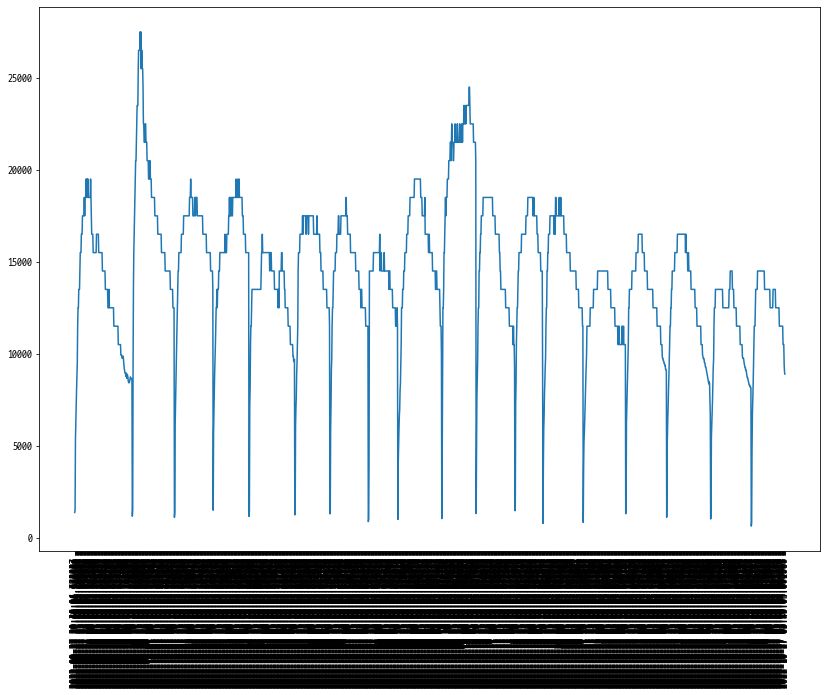

In [12]:
# 시간에 따른 시청자수 변화
plt.figure(figsize=(14,10))
plt.xticks(rotation="vertical")
plt.plot(df_p['일시'], df_p['시청자수'])
plt.show()

<BarContainer object of 29 artists>

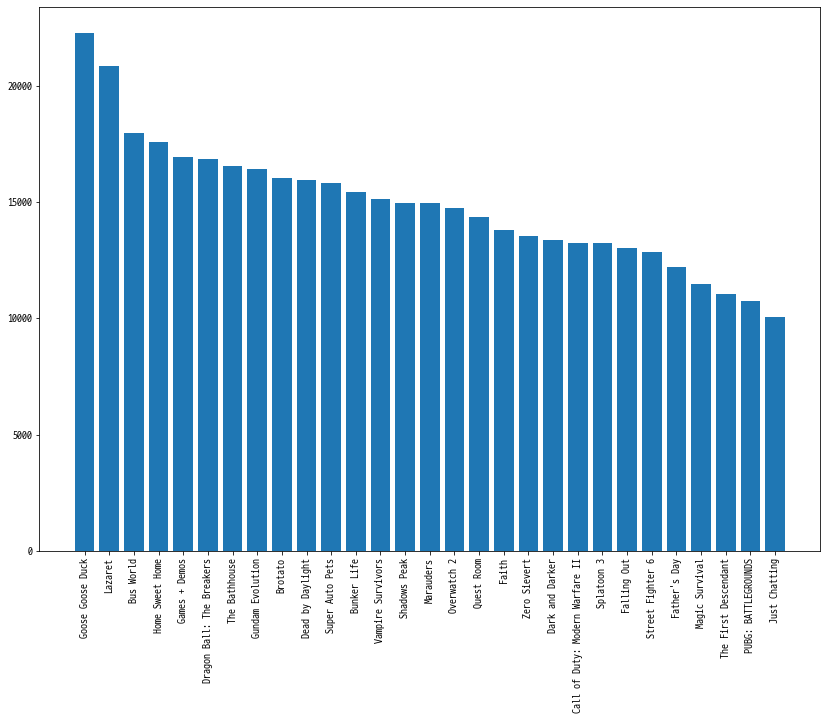

In [25]:
# 카테고리별 평균 시청자수 
plt.figure(figsize=(14,10))
df_1 = df_p.groupby(by=['카테고리']).mean()
df_1_sorted = df_1.sort_values('시청자수', ascending=False)
plt.xticks(rotation="vertical")
plt.bar(df_1_sorted.index,df_1_sorted['시청자수'], )

In [55]:
from datetime import datetime, timedelta
import numpy as np
df_p['일시'] = pd.to_datetime(df_p['일시'])
df_p['flag'] = np.zeros(len(df_p))
for i in range(len(df_p)-1):
    print(i)
    if (df_p['일시'].iloc[i+1] - df_p['일시'].iloc[i]) > timedelta(hours=3) :
        df_p['flag'].iloc[i+1]= True
df_p['flag']

C:\Users\tjoeun-jr-902-02\AppData\Local\Temp\ipykernel_10376\2569655261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p['일시'] = pd.to_datetime(df_p['일시'])
C:\Users\tjoeun-jr-902-02\AppData\Local\Temp\ipykernel_10376\2569655261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p['flag'] = np.zeros(len(df_p))
C:\Users\tjoeun-jr-902-02\AppData\Local\Temp\ipykernel_10376\2569655261.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

919       0.0
968       0.0
995       0.0
1045      0.0
1093      0.0
         ... 
420706    0.0
420756    0.0
420806    0.0
420856    0.0
420906    0.0
Name: flag, Length: 1924, dtype: object

In [56]:
df_p[df_p['flag'] == True]

,이름,제목,시청자수,카테고리,일시,flag
43600,풍월량 (hanryang1125),풍월량,1171,Just Chatting,2022-09-30 20:10:05.284196,True
58105,풍월량 (hanryang1125),풍월량,1109,Just Chatting,2022-10-01 20:25:05.292208,True
72425,풍월량 (hanryang1125),풍,1494,Just Chatting,2022-10-02 20:25:05.269860,True
101067,풍월량 (hanryang1125),풍월량,1160,Just Chatting,2022-10-04 20:20:05.361883,True
115510,풍월량 (hanryang1125),풍월량,1241,Just Chatting,2022-10-05 20:25:05.020939,True
129802,풍월량 (hanryang1125),풍월량,1294,Just Chatting,2022-10-06 20:25:05.504286,True
144075,풍월량 (hanryang1125),풍월량,874,Just Chatting,2022-10-07 20:15:04.690880,True
157459,풍월량 (hanryang1125),풍월량,992,Just Chatting,2022-10-08 20:25:06.072260,True
170835,풍월량 (hanryang1125),풍월량,1035,Just Chatting,2022-10-09 18:50:04.973687,True
186180,풍월량 (hanryang1125),풍월량,1312,Just Chatting,2022-10-10 20:25:06.387940,True


(array([346., 143., 223., 409., 125., 140., 160., 126., 117., 135.]),
 array([ 0. ,  2.8,  5.6,  8.4, 11.2, 14. , 16.8, 19.6, 22.4, 25.2, 28. ]),
 <BarContainer object of 10 artists>)

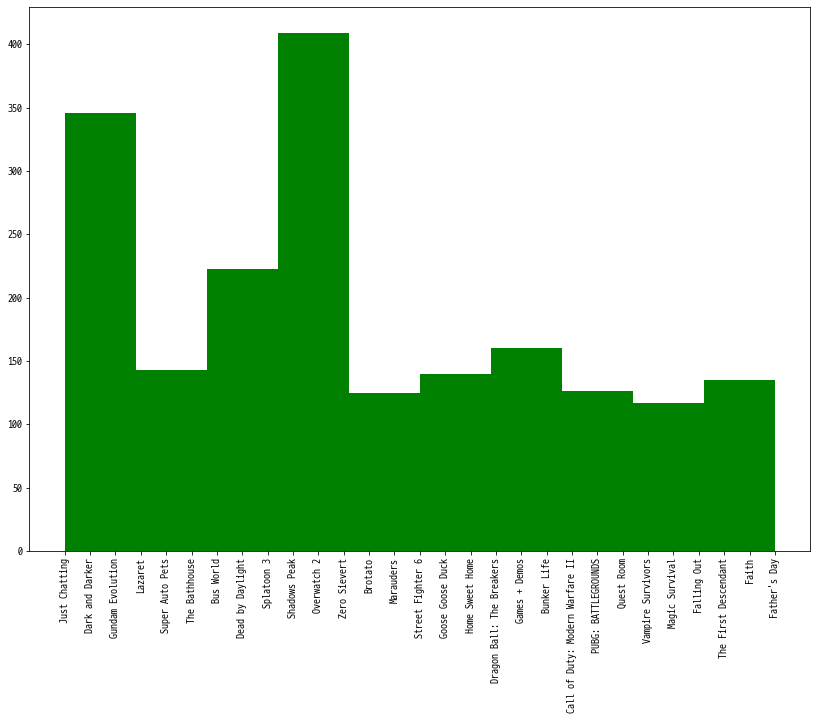

In [25]:
plt.figure(figsize=(14,10))
plt.xticks(rotation='vertical')
plt.hist(df_p['카테고리'], color='g' )

In [26]:
df_p['카테고리'].value_counts()

Overwatch 2                        342
Just Chatting                      197
Dead by Daylight                   158
Dark and Darker                    139
Super Auto Pets                    102
Call of Duty: Modern Warfare II     82
Bunker Life                         75
Brotato                             72
Dragon Ball: The Breakers           64
Goose Goose Duck                    62
The First Descendant                58
Home Sweet Home                     55
Marauders                           53
Faith                               45
Magic Survival                      43
Shadows Peak                        43
Falling Out                         40
Bus World                           36
Vampire Survivors                   34
Father's Day                        32
Splatoon 3                          29
The Bathhouse                       27
Quest Room                          24
Zero Sievert                        24
Street Fighter 6                    23
Games + Demos            

### 시간대별로 집계할 수 있도록 전처리하자

In [61]:
for i,row in df_p.iterrows():
    print(row['이름'])

풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryang1125)
풍월량 (hanryan